In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('MOSPP.xlsx')
N, M = list(data.columns[0:2])
data = data.rename (columns = { N: 'Nodo_Inicio',
                                M: 'Nodo_Fin', 
                                'Unnamed: 2': 'Distancia',
                                'Unnamed: 3': 'Emisiones',
                                'Unnamed: 4': 'Riesgo'})


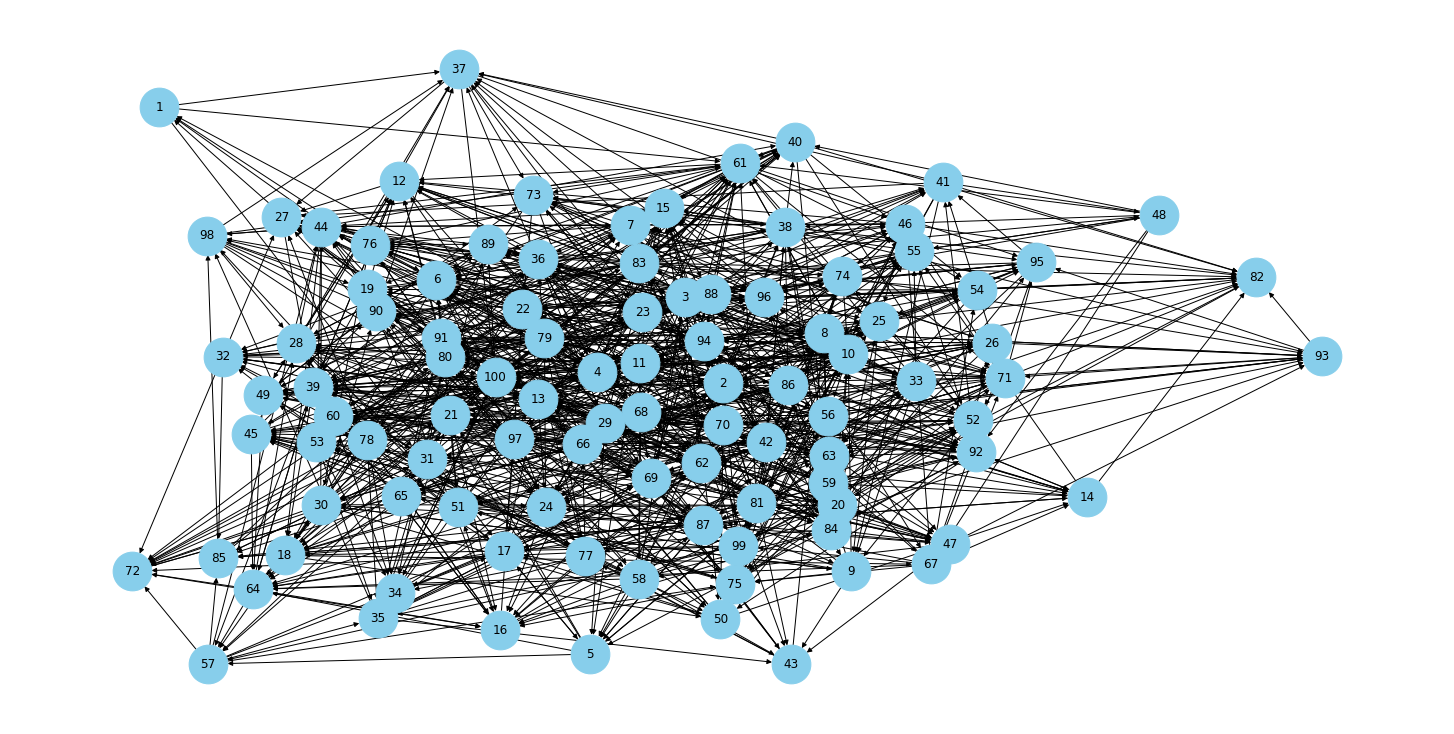

In [3]:
# draw the graph with networkx and matplotlib taking into account the distance and the links between nodes (edges) 

import networkx as nx
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
G = nx.from_pandas_edgelist(data, 'Nodo_Inicio', 'Nodo_Fin', ['Distancia', 'Emisiones', 'Riesgo'], create_using=nx.DiGraph())
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=12)
plt.show()

In [6]:
data

,Nodo_Inicio,Nodo_Fin,Distancia,Emisiones,Riesgo
0,1,17,74,13,14
1,1,37,61,5,10
2,1,61,12,26,63
3,2,15,81,1,13
4,2,16,46,20,1
...,...,...,...,...,...
985,100,84,26,9,15
986,100,88,84,6,5
987,100,89,64,12,9
988,100,94,26,33,36


In [13]:
data_distance = pd.crosstab(data.Nodo_Inicio, data.Nodo_Fin, data.Distancia, aggfunc='sum')
# create a matrix in numpy with the distances between node
distance_matrix = data_distance.fillna(0).to_numpy()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 92., 86.],
       [ 0., 90.,  0., ...,  0.,  0., 15.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 15., ...,  0., 68.,  0.]])

In [25]:
# create the graph
graph = {}
for i in range(len(data)):
    if data.Nodo_Inicio[i] not in graph:
        graph[data.Nodo_Inicio[i]] = {}
    graph[data.Nodo_Inicio[i]][data.Nodo_Fin[i]] = {'Distancia': data.Distancia[i], 'Emisiones': data.Emisiones[i], 'Riesgo': data.Riesgo[i]}
    if data.Nodo_Fin[i] not in graph:
        graph[data.Nodo_Fin[i]] = {}
    graph[data.Nodo_Fin[i]][data.Nodo_Inicio[i]] = {'Distancia': data.Distancia[i], 'Emisiones': data.Emisiones[i], 'Riesgo': data.Riesgo[i]}

# create the djistra algorithm
def dijkstra(graph, start, end):
    shortest_distance = {}
    predecessor = {}
    unseenNodes = graph
    infinity = 9999999
    path = []
    for node in unseenNodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0

    while unseenNodes:
        minNode = None
        for node in unseenNodes:
            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode]:
                minNode = node

        for childNode, weight in graph[minNode].items():
            if weight['Distancia'] + shortest_distance[minNode] < shortest_distance[childNode]:
                shortest_distance[childNode] = weight['Distancia'] + shortest_distance[minNode]
                predecessor[childNode] = minNode
        unseenNodes.pop(minNode)

    currentNode = end
    while currentNode != start:
        try:
            path.insert(0,currentNode)
            currentNode = predecessor[currentNode]
        except KeyError:
            print('Path not reachable')
            break
    path.insert(0,start)
    if shortest_distance[end] != infinity:
        print('Shortest distance is ' + str(shortest_distance[end]))
        print('And the path is ' + str(path))
    
    # return the shortest distance and the path
    return shortest_distance[end], path


cost, path =  dijkstra(graph, 1, 100)




Shortest distance is 78
And the path is [1, 61, 24, 100]
